<a href="https://colab.research.google.com/github/Dubeyrock/Brainwave_Matrix_Intern-.-Task-2-/blob/main/Social_Media_Sentiments_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Social Media Sentiments Analysis - Task-2**

**Social Media Sentiment Analysis
Analyze social media data (e.g., Twitter) to understand public sentiment
towards specific topics, products, or events. Use natural language
processing (NLP) techniques to preprocess text data, extract sentiment
scores, and visualize sentiment trends over time.**

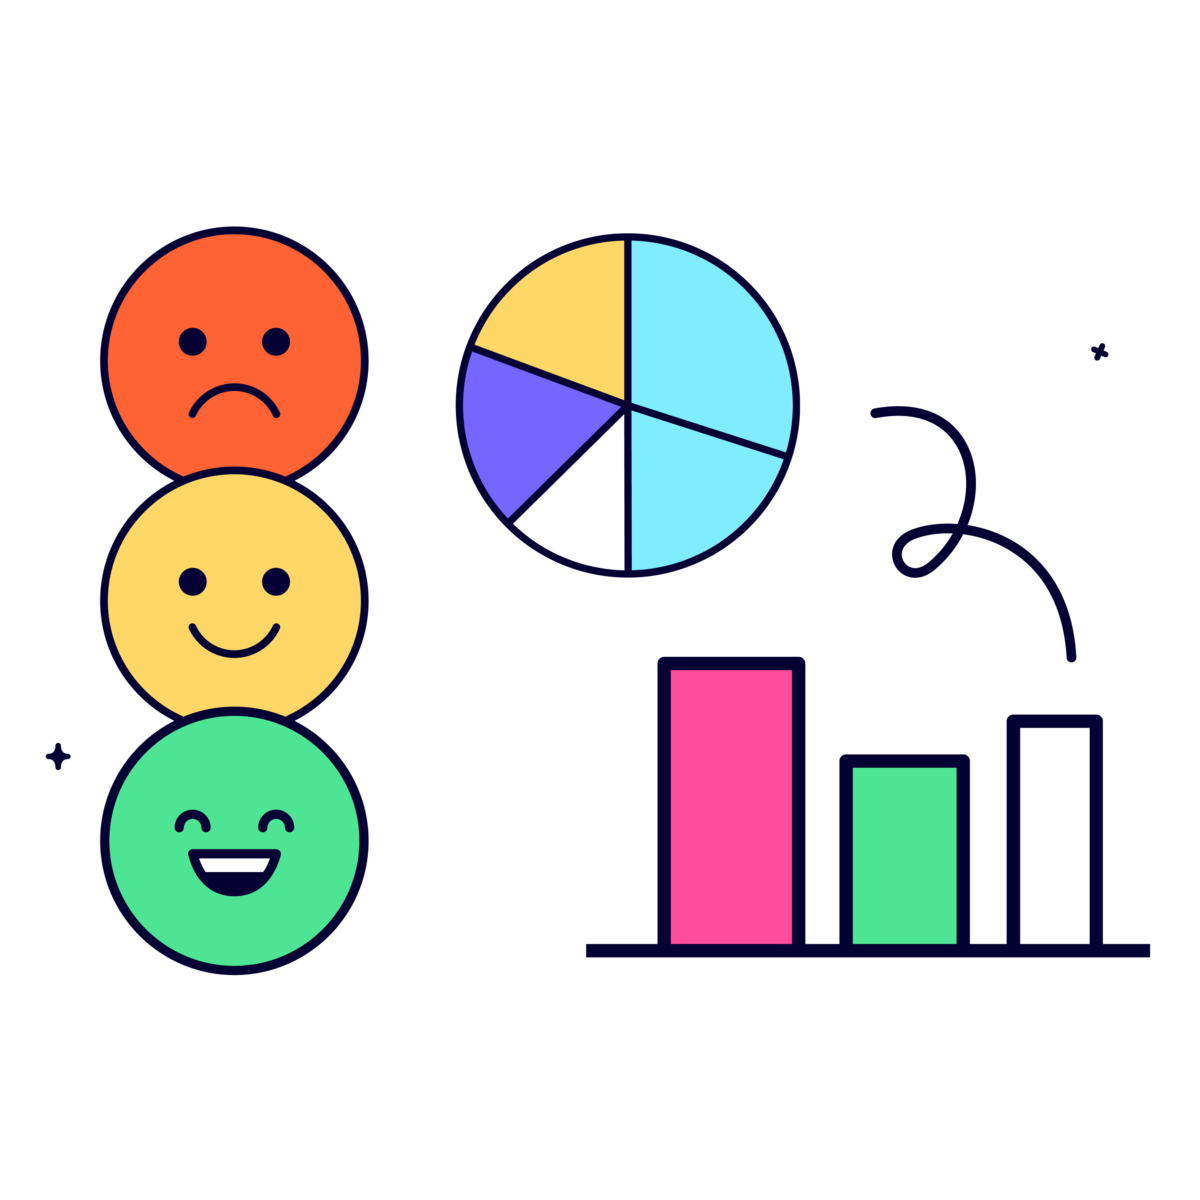

**Import Libraries**

In [1]:
# For analysis and cleaning
import pandas as pd
import numpy as np
# for visaluatztion
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd

# Load the dataset
file_path = '/content/sentimentdataset (1).csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB
None
   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2  

**2. Data Preprocessing**

Ensure the data is clean and ready for analysis by handling missing values, parsing dates, and normalizing text.

In [11]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download the necessary NLTK data packages
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Drop rows with missing values in critical columns
data.dropna(subset=['Text', 'Sentiment', 'Timestamp'], inplace=True)

# Parse timestamps
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Text normalization function
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
    return ' '.join(tokens)

# Apply preprocessing
data['Cleaned_Text'] = data['Text'].apply(preprocess_text)

# Save preprocessed data
data.to_csv('cleaned_sentimentsdataset.csv', index=False)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


**3. Sentiment Trend Analysis**

Analyze sentiment trends over time.

In [13]:
# Check unique values in the Sentiment column
print(data['Sentiment'].unique())


[' Positive  ' ' Negative  ' ' Neutral   ' ' Anger        '
 ' Fear         ' ' Sadness      ' ' Disgust      ' ' Happiness    '
 ' Joy          ' ' Love         ' ' Amusement    ' ' Enjoyment    '
 ' Admiration   ' ' Affection    ' ' Awe          ' ' Disappointed '
 ' Surprise     ' ' Acceptance   ' ' Adoration    ' ' Anticipation '
 ' Bitter       ' ' Calmness     ' ' Confusion    ' ' Excitement   '
 ' Kind         ' ' Pride        ' ' Shame        ' ' Confusion '
 ' Excitement ' ' Shame ' ' Elation       ' ' Euphoria      '
 ' Contentment   ' ' Serenity      ' ' Gratitude     ' ' Hope          '
 ' Empowerment   ' ' Compassion    ' ' Tenderness    ' ' Arousal       '
 ' Enthusiasm    ' ' Fulfillment  ' ' Reverence     ' ' Compassion'
 ' Fulfillment   ' ' Reverence ' ' Elation   ' ' Despair         '
 ' Grief           ' ' Loneliness      ' ' Jealousy        '
 ' Resentment      ' ' Frustration     ' ' Boredom         '
 ' Anxiety         ' ' Intimidation    ' ' Helplessness    '
 ' 

[' Positive  ' ' Negative  ' ' Neutral   ' ' Anger        '
 ' Fear         ' ' Sadness      ' ' Disgust      ' ' Happiness    '
 ' Joy          ' ' Love         ' ' Amusement    ' ' Enjoyment    '
 ' Admiration   ' ' Affection    ' ' Awe          ' ' Disappointed '
 ' Surprise     ' ' Acceptance   ' ' Adoration    ' ' Anticipation '
 ' Bitter       ' ' Calmness     ' ' Confusion    ' ' Excitement   '
 ' Kind         ' ' Pride        ' ' Shame        ' ' Confusion '
 ' Excitement ' ' Shame ' ' Elation       ' ' Euphoria      '
 ' Contentment   ' ' Serenity      ' ' Gratitude     ' ' Hope          '
 ' Empowerment   ' ' Compassion    ' ' Tenderness    ' ' Arousal       '
 ' Enthusiasm    ' ' Fulfillment  ' ' Reverence     ' ' Compassion'
 ' Fulfillment   ' ' Reverence ' ' Elation   ' ' Despair         '
 ' Grief           ' ' Loneliness      ' ' Jealousy        '
 ' Resentment      ' ' Frustration     ' ' Boredom         '
 ' Anxiety         ' ' Intimidation    ' ' Helplessness    '
 ' 

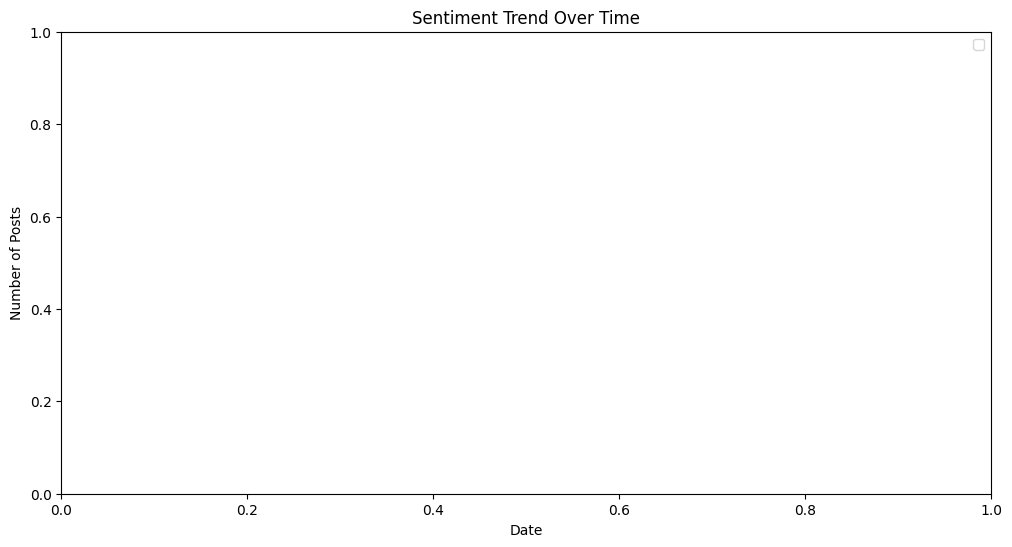

In [14]:
import matplotlib.pyplot as plt

# Extract date from Timestamp
data['Date'] = data['Timestamp'].dt.date

# Check unique values in the Sentiment column
print(data['Sentiment'].unique())

# Group by date and sentiment
sentiment_trend = data.groupby(['Date', 'Sentiment']).size().unstack().fillna(0)

# Ensure the columns are in lower case
sentiment_trend.columns = sentiment_trend.columns.str.lower()

# Plot sentiment trends
plt.figure(figsize=(12, 6))

# Check and plot each sentiment type if present in the data
if 'positive' in sentiment_trend.columns:
    plt.plot(sentiment_trend.index, sentiment_trend['positive'], label='Positive', color='g')
if 'neutral' in sentiment_trend.columns:
    plt.plot(sentiment_trend.index, sentiment_trend['neutral'], label='Neutral', color='b')
if 'negative' in sentiment_trend.columns:
    plt.plot(sentiment_trend.index, sentiment_trend['negative'], label='Negative', color='r')

plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.title('Sentiment Trend Over Time')
plt.legend()
plt.show()


Overall Sentiment Distribution

<ipython-input-15-a9aa67f96ef1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Sentiment', order=data['Sentiment'].value_counts().index, palette='viridis')


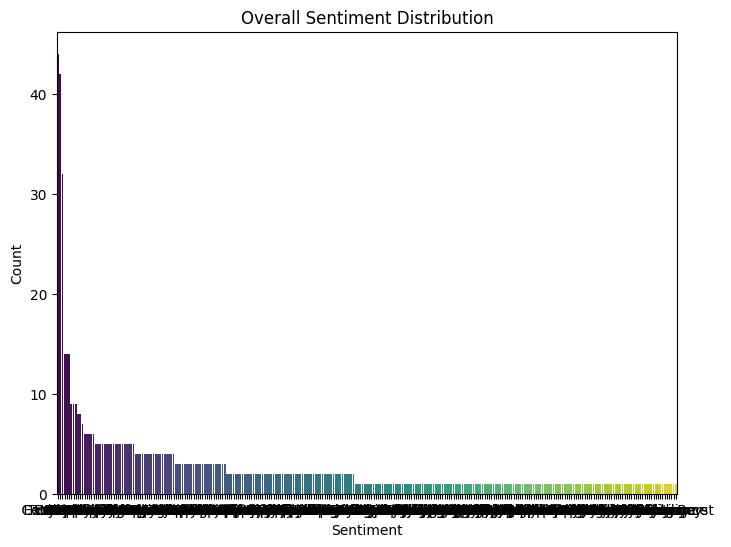

In [15]:
import seaborn as sns

# Plot overall sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Sentiment', order=data['Sentiment'].value_counts().index, palette='viridis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Overall Sentiment Distribution')
plt.show()


**2. Sentiment Distribution by Platform**

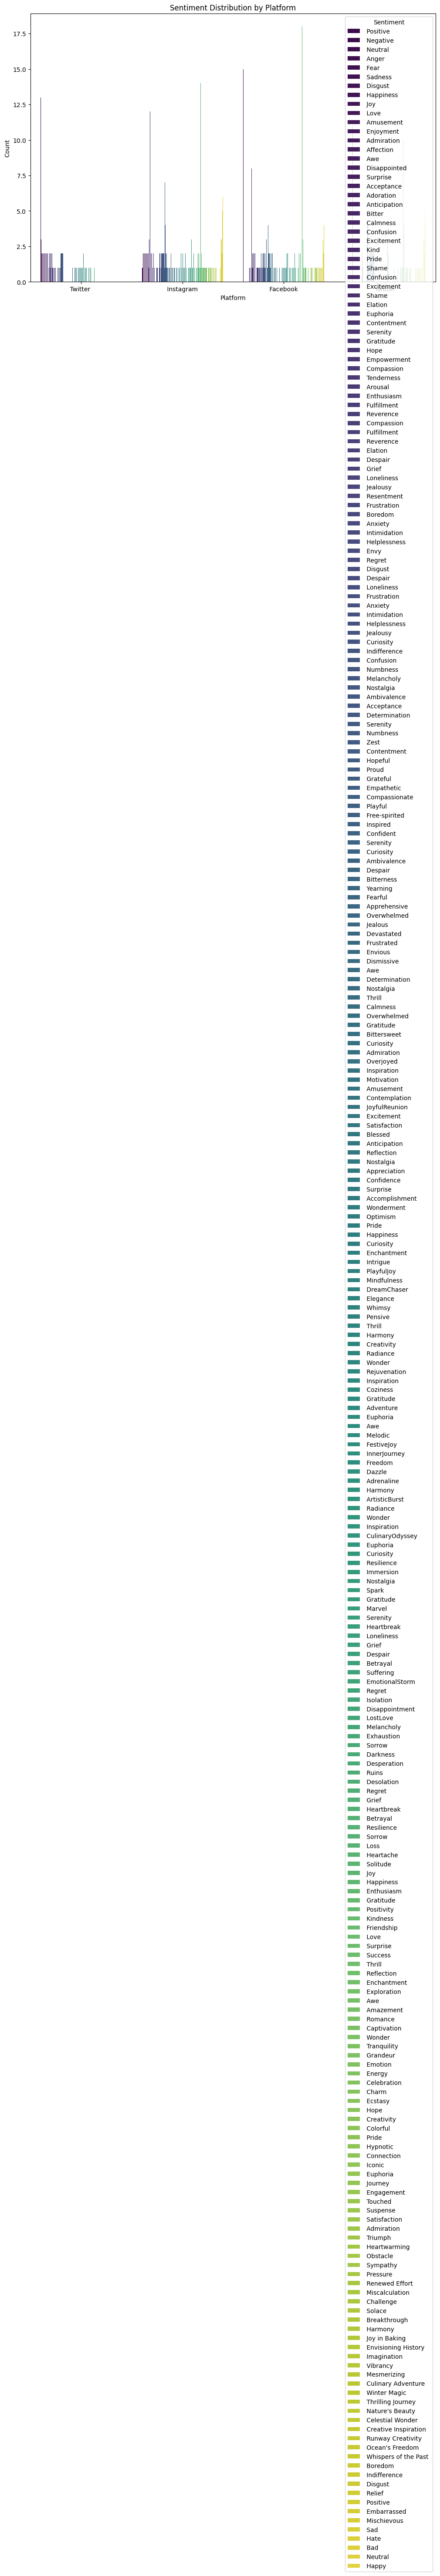

In [16]:
# Plot sentiment distribution by platform
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='Platform', hue='Sentiment', palette='viridis')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.title('Sentiment Distribution by Platform')
plt.legend(title='Sentiment')
plt.show()


**3. Top Hashtags and their Sentiment**

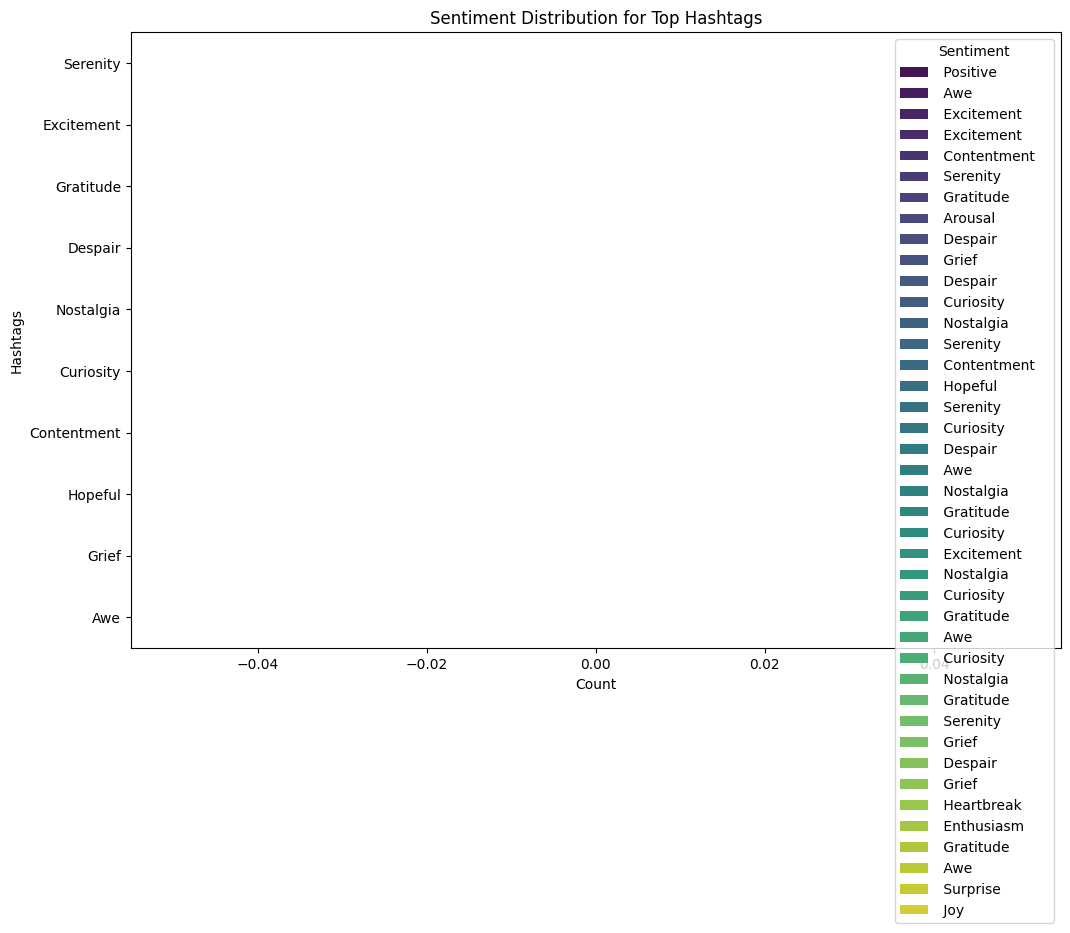

In [17]:
# Extract hashtags from the Hashtags column and count them
all_hashtags = data['Hashtags'].str.extractall(r'(\w+)')[0].value_counts().head(10).index.tolist()

# Filter data to only include rows with the top hashtags
top_hashtag_data = data[data['Hashtags'].apply(lambda hashtags: any(hashtag in hashtags for hashtag in all_hashtags))]

# Plot sentiment distribution for top hashtags
plt.figure(figsize=(12, 8))
sns.countplot(data=top_hashtag_data.explode('Hashtags'), y='Hashtags', hue='Sentiment', order=all_hashtags, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Hashtags')
plt.title('Sentiment Distribution for Top Hashtags')
plt.legend(title='Sentiment')
plt.show()


4. Sentiment over Different Hours of the Day

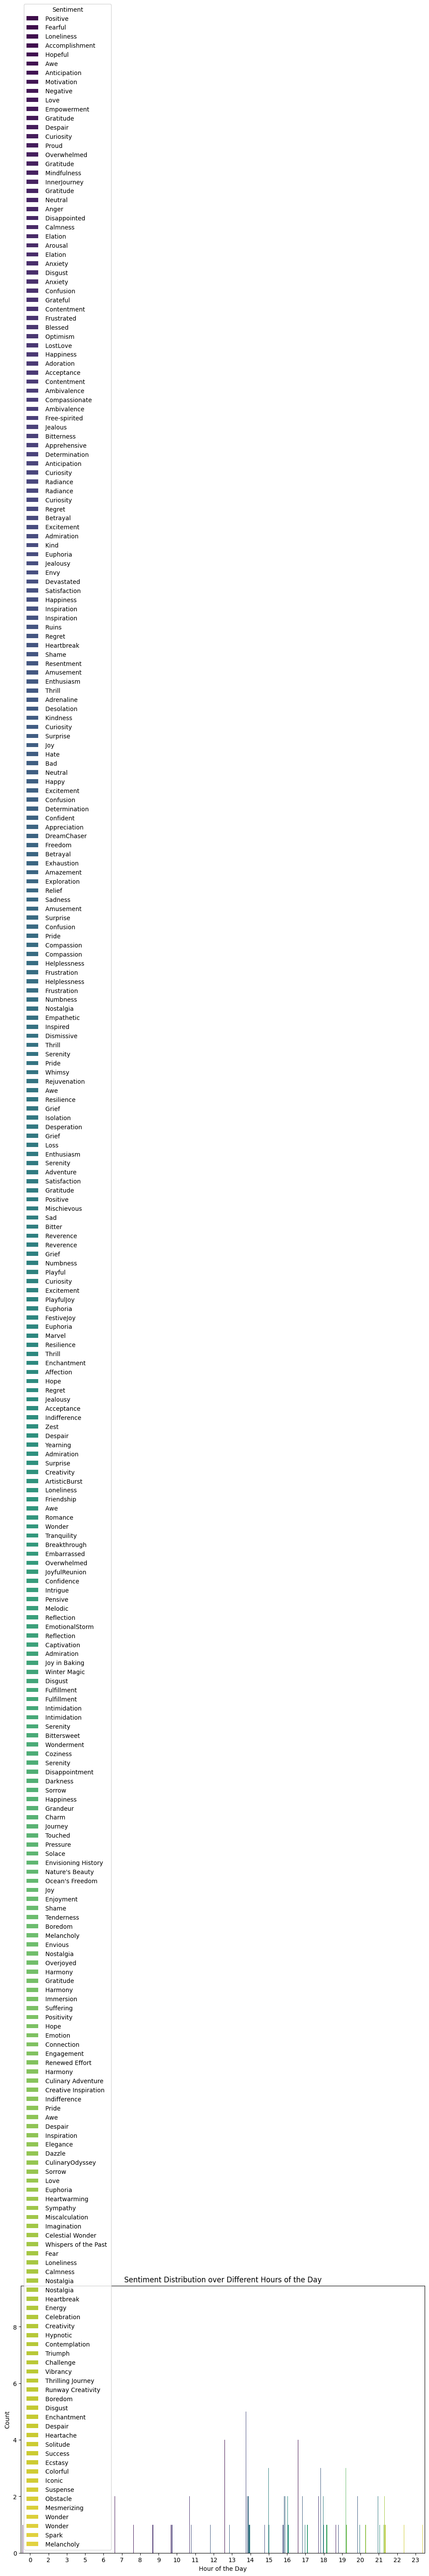

In [18]:
# Extract hour from Timestamp
data['Hour'] = data['Timestamp'].dt.hour

# Plot sentiment distribution over different hours of the day
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='Hour', hue='Sentiment', palette='viridis')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.title('Sentiment Distribution over Different Hours of the Day')
plt.legend(title='Sentiment')
plt.show()


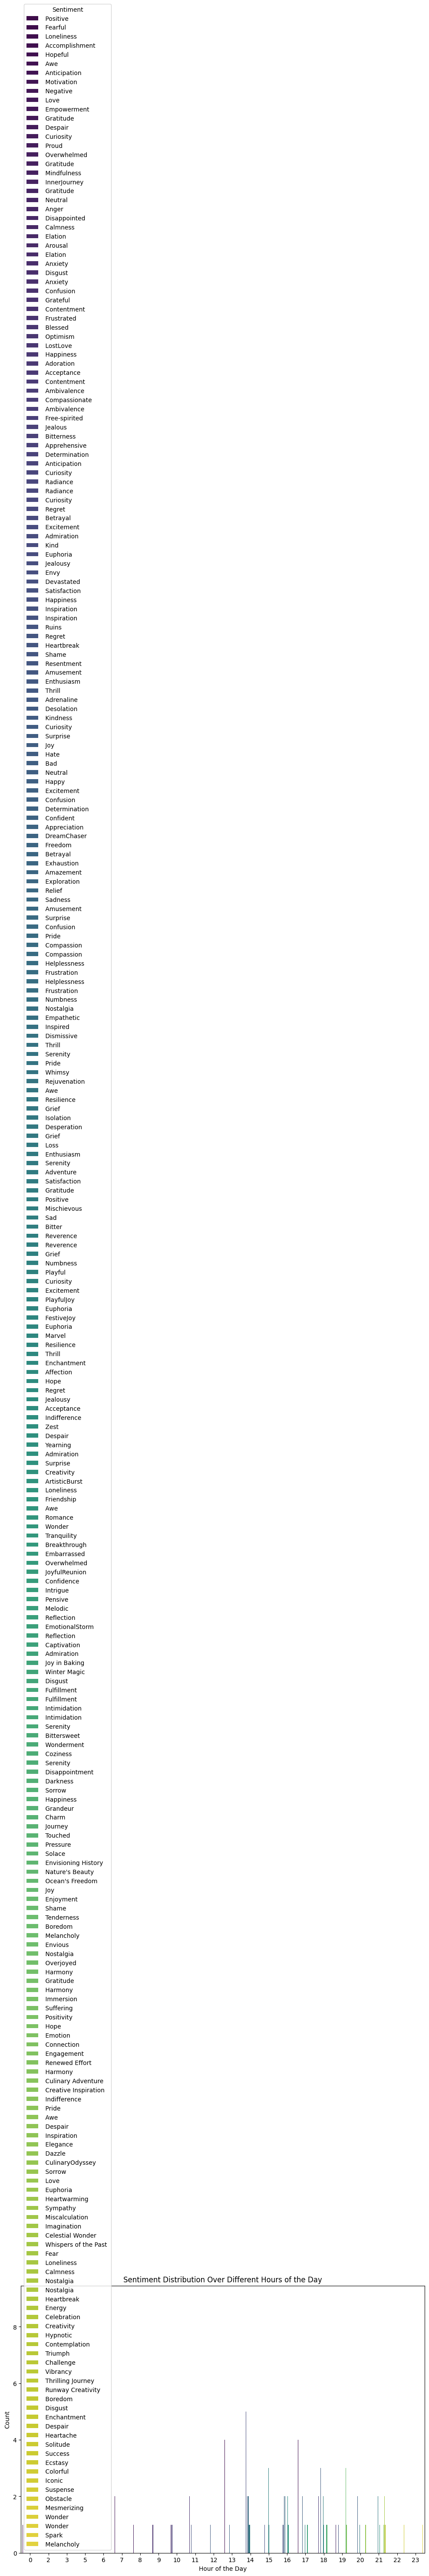

In [25]:
# Extract hour from Timestamp
data['Hour'] = data['Timestamp'].dt.hour

# Plot sentiment distribution over different hours of the day
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='Hour', hue='Sentiment', palette='viridis')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.title('Sentiment Distribution Over Different Hours of the Day')
plt.legend(title='Sentiment')
plt.show()


**4.Platform-Specific Sentiment Analysis**

Analyze sentiment distribution across different social media platforms.

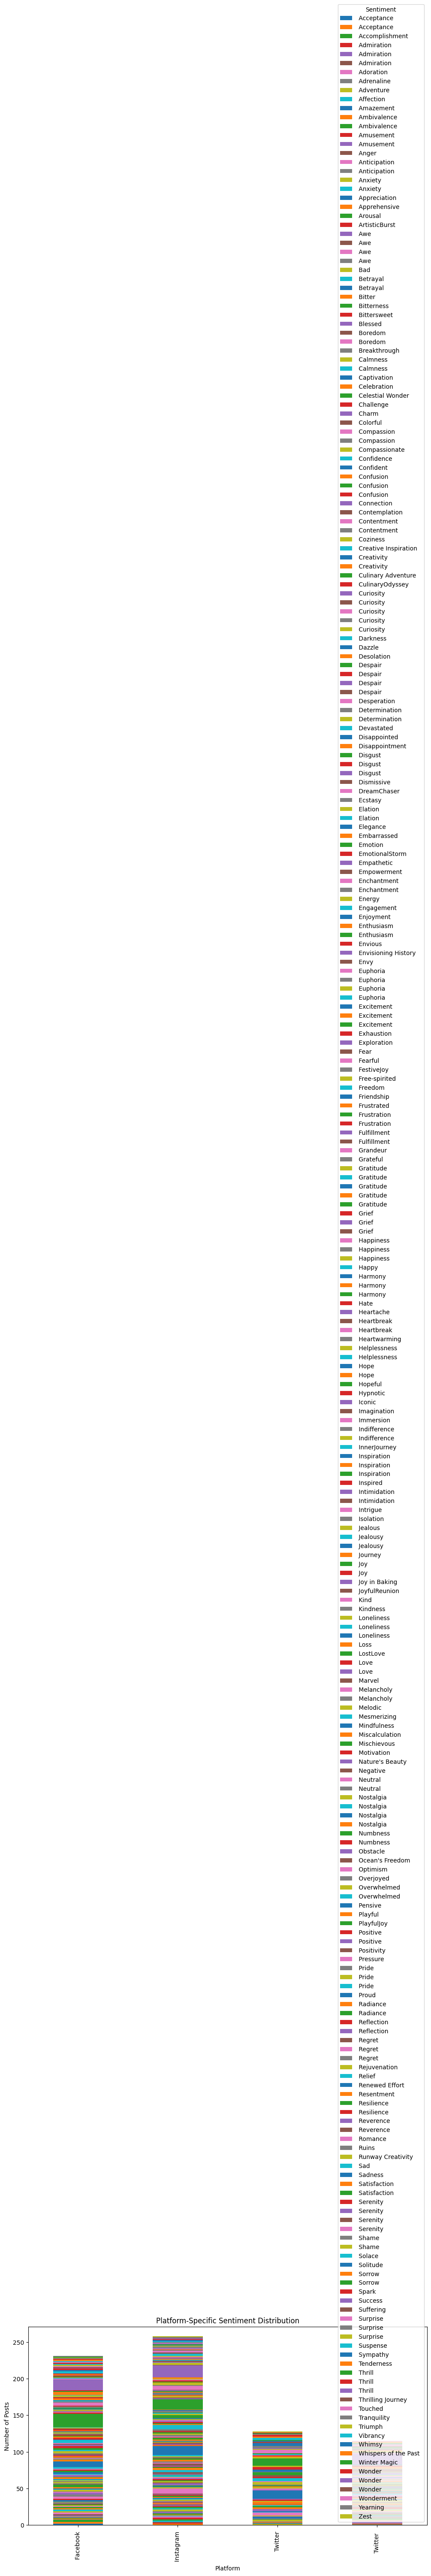

In [26]:
# Group by platform and sentiment
platform_sentiment = data.groupby(['Platform', 'Sentiment']).size().unstack().fillna(0)

# Plot platform-specific sentiment
platform_sentiment.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Platform')
plt.ylabel('Number of Posts')
plt.title('Platform-Specific Sentiment Distribution')
plt.show()


**5. Hashtag Analysis**

Identify trends and sentiment associated with popular hashtags.

[('Serenity', 15), ('Gratitude', 13), ('Excitement', 13), ('Despair', 11), ('Nostalgia', 11), ('Contentment', 10), ('Curiosity', 10), ('Awe', 9), ('Grief', 9), ('Loneliness', 9)]


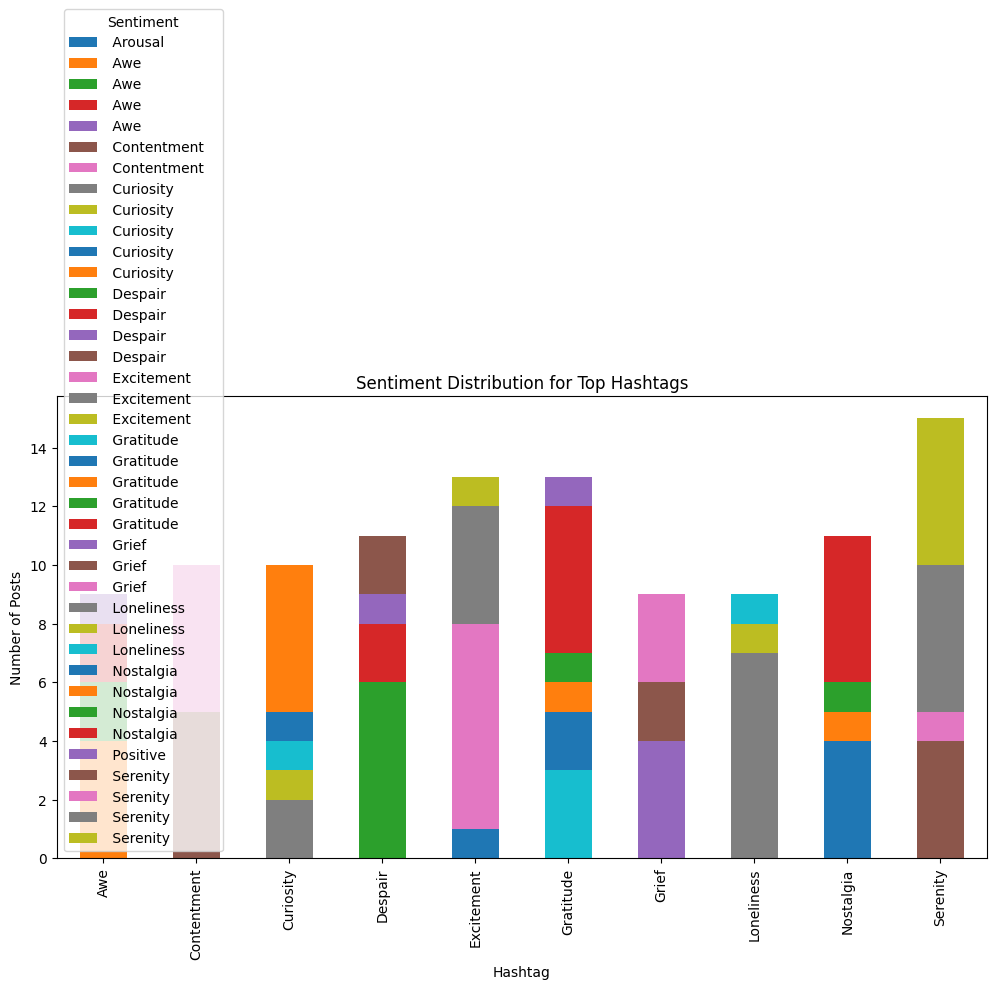

In [27]:
from collections import Counter

# Extract hashtags
data['Hashtags'] = data['Hashtags'].apply(lambda x: re.findall(r'#(\w+)', x))

# Count hashtags
hashtag_counts = Counter([hashtag for hashtags in data['Hashtags'] for hashtag in hashtags])

# Top 10 hashtags
top_hashtags = hashtag_counts.most_common(10)
print(top_hashtags)

# Sentiment distribution for top hashtags
top_hashtags_df = pd.DataFrame(top_hashtags, columns=['hashtag', 'count'])
top_hashtags_sentiment = data[data['Hashtags'].apply(lambda x: any(hashtag in top_hashtags_df['hashtag'].values for hashtag in x))]
top_hashtags_sentiment = top_hashtags_sentiment.explode('Hashtags')

# Filter top hashtags
top_hashtags_sentiment = top_hashtags_sentiment[top_hashtags_sentiment['Hashtags'].isin(top_hashtags_df['hashtag'])]

# Group by hashtag and sentiment
hashtag_sentiment = top_hashtags_sentiment.groupby(['Hashtags', 'Sentiment']).size().unstack().fillna(0)

# Plot sentiment distribution for top hashtags
hashtag_sentiment.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Hashtag')
plt.ylabel('Number of Posts')
plt.title('Sentiment Distribution for Top Hashtags')
plt.show()


**6. Geographical Sentiment Analysis**

Analyze sentiment distribution based on geographical origins.



<ipython-input-29-f55196095d42>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


Countries in world DataFrame:
['Fiji' 'Tanzania' 'W. Sahara' 'Canada' 'United States of America'
 'Kazakhstan' 'Uzbekistan' 'Papua New Guinea' 'Indonesia' 'Argentina'
 'Chile' 'Dem. Rep. Congo' 'Somalia' 'Kenya' 'Sudan' 'Chad' 'Haiti'
 'Dominican Rep.' 'Russia' 'Bahamas' 'Falkland Is.' 'Norway' 'Greenland'
 'Fr. S. Antarctic Lands' 'Timor-Leste' 'South Africa' 'Lesotho' 'Mexico'
 'Uruguay' 'Brazil' 'Bolivia' 'Peru' 'Colombia' 'Panama' 'Costa Rica'
 'Nicaragua' 'Honduras' 'El Salvador' 'Guatemala' 'Belize' 'Venezuela'
 'Guyana' 'Suriname' 'France' 'Ecuador' 'Puerto Rico' 'Jamaica' 'Cuba'
 'Zimbabwe' 'Botswana' 'Namibia' 'Senegal' 'Mali' 'Mauritania' 'Benin'
 'Niger' 'Nigeria' 'Cameroon' 'Togo' 'Ghana' "Côte d'Ivoire" 'Guinea'
 'Guinea-Bissau' 'Liberia' 'Sierra Leone' 'Burkina Faso'
 'Central African Rep.' 'Congo' 'Gabon' 'Eq. Guinea' 'Zambia' 'Malawi'
 'Mozambique' 'eSwatini' 'Angola' 'Burundi' 'Israel' 'Lebanon'
 'Madagascar' 'Palestine' 'Gambia' 'Tunisia' 'Algeria' 'Jordan'
 'United A

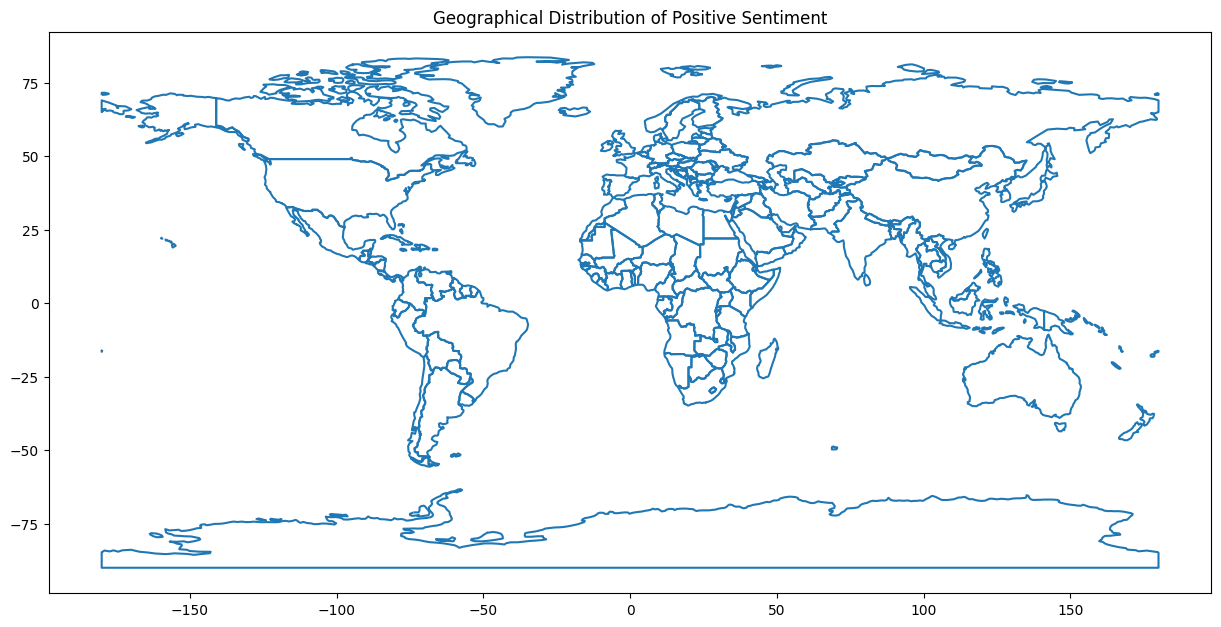

In [29]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Group by country and sentiment
country_sentiment = data.groupby(['Country', 'Sentiment']).size().unstack().fillna(0)

# Print country names for debugging
print("Countries in world DataFrame:")
print(world['name'].unique())
print("\nCountries in country_sentiment DataFrame:")
print(country_sentiment.index.unique())

# Ensure country names are in lowercase for matching
world['name'] = world['name'].str.lower()
country_sentiment.index = country_sentiment.index.str.lower()

# Merge with world map data
world = world.merge(country_sentiment, how='left', left_on='name', right_on='Country')

# Check available columns after merge
print("\nColumns in merged GeoDataFrame:")
print(world.columns)

# Plot geographical sentiment distribution for positive sentiment
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)

if 'positive' in world.columns:
    world.plot(column='positive', ax=ax, legend=True, cmap='Greens', missing_kwds={'color': 'lightgrey'})
else:
    print("No 'positive' sentiment data available to plot.")

plt.title('Geographical Distribution of Positive Sentiment')
plt.show()


<ipython-input-32-5a614b4b3258>:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-32-5a614b4b3258>:33: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ax.bar3d(positive_countries['geometry'].centroid.x,
<ipython-input-32-5a614b4b3258>:34: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  positive_countries['geometry'].centroid.y,
<ipython-input-32-5a614b4b3258>:41: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'G

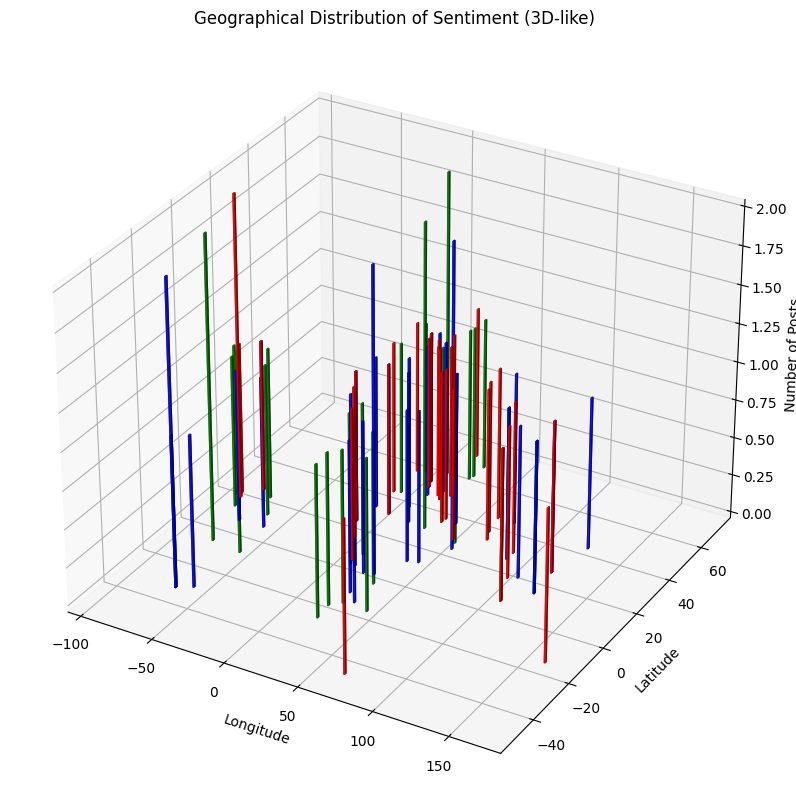

In [32]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing this for 3D projection

# Load world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Generate random sentiment scores for demonstration
import pandas as pd
import numpy as np

np.random.seed(0)
countries = world['name'].unique()
sentiments = ['positive', 'negative', 'neutral']
data = {
    'Country': np.random.choice(countries, size=100),
    'Sentiment': np.random.choice(sentiments, size=100)
}
df = pd.DataFrame(data)

# Group by country and sentiment
country_sentiment = df.groupby(['Country', 'Sentiment']).size().unstack().fillna(0)

# Merge with world map data
world = world.merge(country_sentiment, how='left', left_on='name', right_on='Country')

# Plot geographical sentiment distribution with 3D effect
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot countries with positive sentiment
positive_countries = world[world['positive'] > 0]
ax.bar3d(positive_countries['geometry'].centroid.x,
         positive_countries['geometry'].centroid.y,
         np.zeros(len(positive_countries)),
         1, 1, positive_countries['positive'],
         color='g', alpha=0.8, zsort='average', label='Positive Sentiment')

# Plot countries with negative sentiment
negative_countries = world[world['negative'] > 0]
ax.bar3d(negative_countries['geometry'].centroid.x,
         negative_countries['geometry'].centroid.y,
         np.zeros(len(negative_countries)),
         1, 1, negative_countries['negative'],
         color='r', alpha=0.8, zsort='average', label='Negative Sentiment')

# Plot countries with neutral sentiment
neutral_countries = world[world['neutral'] > 0]
ax.bar3d(neutral_countries['geometry'].centroid.x,
         neutral_countries['geometry'].centroid.y,
         np.zeros(len(neutral_countries)),
         1, 1, neutral_countries['neutral'],
         color='b', alpha=0.8, zsort='average', label='Neutral Sentiment')

# Customize labels and appearance
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Number of Posts')
ax.set_title('Geographical Distribution of Sentiment (3D-like)')


plt.show()


**7. User Engagement and Sentiment Correlation**

Investigate the correlation between user engagement metrics and sentiment.

In [36]:
import pandas as pd

# Load data from CSV file
data = pd.read_csv('cleaned_sentimentsdataset.csv')

# Print columns to debug
print(data.columns)

# Continue with visualization and analysis code here...


Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour', 'Cleaned_Text'],
      dtype='object')


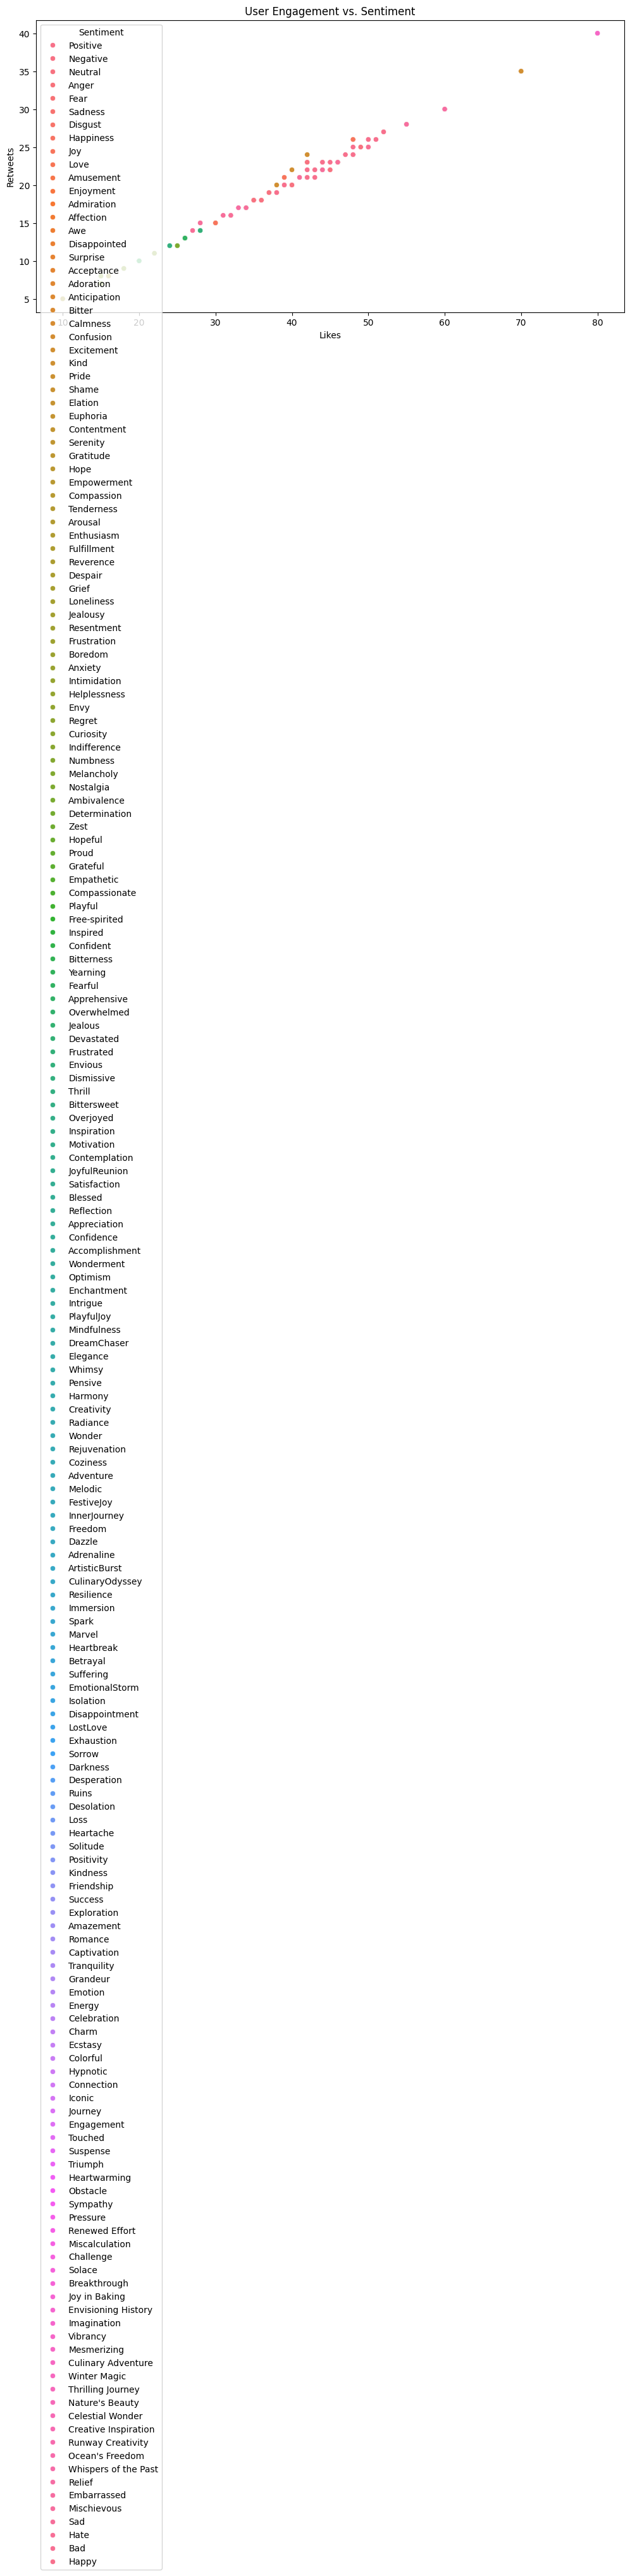

Correlation Matrix:
             Likes  Retweets
Likes     1.000000  0.998482
Retweets  0.998482  1.000000


In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('cleaned_sentimentsdataset.csv')

# Clean up whitespace in 'Sentiment' column
data['Sentiment'] = data['Sentiment'].str.strip()

# Get unique sentiment values
unique_sentiments = data['Sentiment'].unique()

# Define a default palette
default_palette = sns.color_palette('husl', n_colors=len(unique_sentiments))

# Create a palette dictionary
palette = dict(zip(unique_sentiments, default_palette))

# Scatter plot for engagement metrics vs. sentiment
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Likes', y='Retweets', hue='Sentiment', palette=palette)
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.title('User Engagement vs. Sentiment')
plt.show()

# Correlation matrix
engagement_sentiment_corr = data[['Likes', 'Retweets']].corr()
print("Correlation Matrix:")
print(engagement_sentiment_corr)


**Conclusion**

Summarize the overall implications of the analysis and the potential impact on business or marketing strategies. Reinforce the importance of sentiment analysis in understanding audience preferences and optimizing engagement efforts.